In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, auc, mean_absolute_error, mean_squared_error, r2_score
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow import keras
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score

## Data Preprocessing

In [19]:
def create_samples(data, time_steps=12):
  X, y = [], []
  for i in range(len(data) - time_steps):
    X.append(data[i : (i + time_steps)])
    y.append(data[i + time_steps])
  return np.array(X), np.array(y)

In [76]:
# graph data
def graph_spei_data(data, timescale):
  plt.figure(figsize=(24, 7))
  plt.plot(data['spei'], c='cyan')
  title = f"SPEI on {timescale}-Month Timescale"
  plt.title(title)
  plt.xlabel("Date")
  plt.ylabel(f"SPEI-{timescale}")
  plt.figure(figsize=(18, 6))
  plt.show()

### SPEI-1

In [77]:
# load data
spei1_df = pd.read_csv('/content/SPEI_1_MonthTimescale_1950_2013_Fresno_County.csv')
spei1_df.head(5)

,time,lon,lat,spei
0,1950-01-16,-119.75,36.75,0.568691
1,1950-02-15,-119.75,36.75,-0.323044
2,1950-03-16,-119.75,36.75,-0.148050
3,1950-04-16,-119.75,36.75,-0.585959
4,1950-05-16,-119.75,36.75,-0.860067


In [78]:
spei1_df.isnull().sum()

,0
time,0
lon,0
lat,0
spei,0


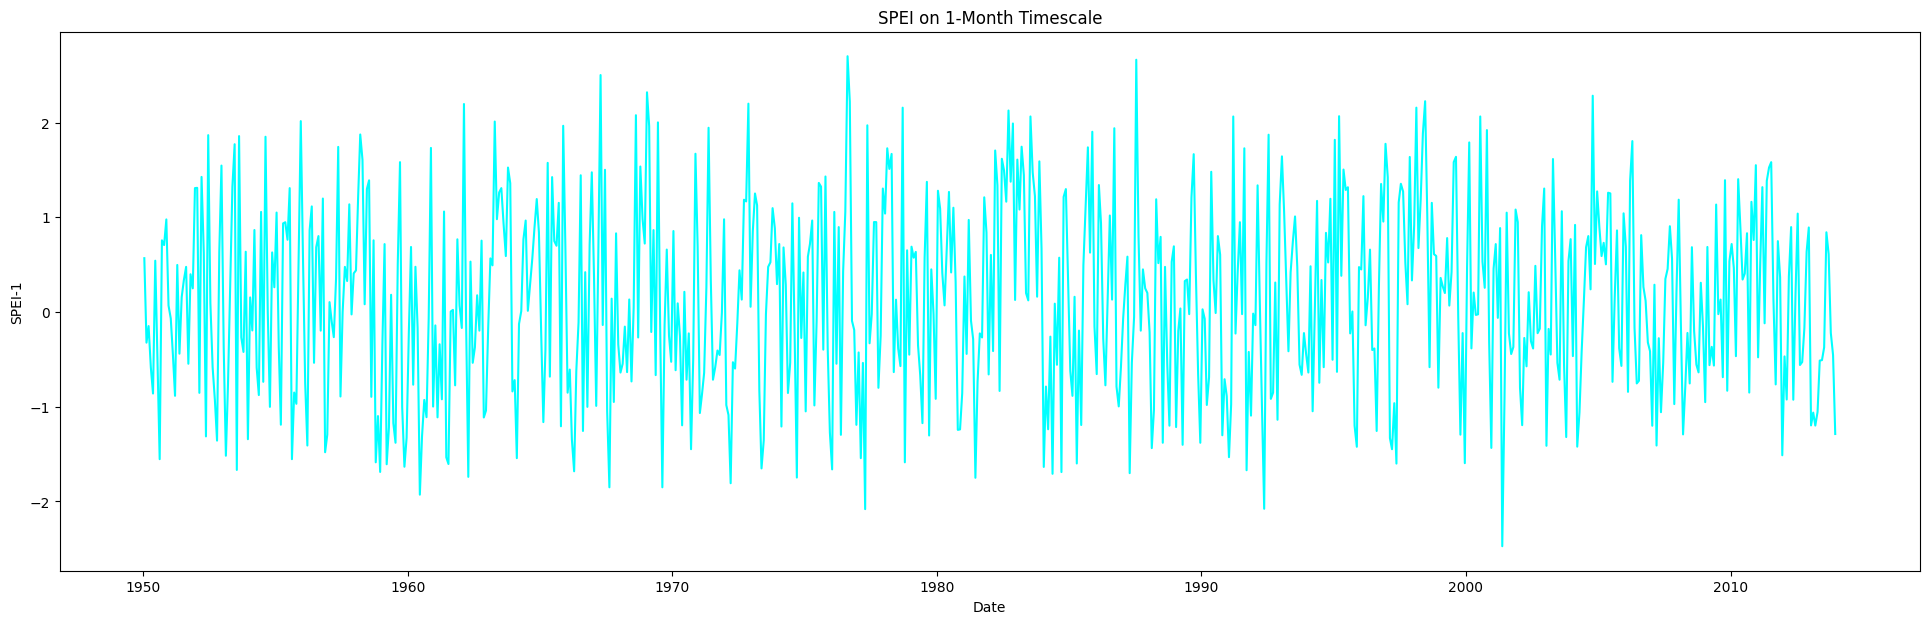

<Figure size 1800x600 with 0 Axes>

In [79]:
spei1_df['time'] = pd.to_datetime(spei1_df['time'], format='%Y-%m-%d')
spei1_df.set_index('time', inplace=True)
graph_spei_data(spei1_df, 1)

In [69]:
# normalize data
scaler = MinMaxScaler(feature_range=(-1, 1))
spei1_df['spei'] = scaler.fit_transform(spei1_df[['spei']])
spei1_df.head(5)

,lon,lat,spei
time,,,
1950-01-16,-119.75,36.75,0.175651
1950-02-15,-119.75,36.75,-0.169104
1950-03-16,-119.75,36.75,-0.101449
1950-04-16,-119.75,36.75,-0.270750
1950-05-16,-119.75,36.75,-0.376723


In [70]:
# get data samples
time_steps = 6
X_spei1, y_spei1 = create_samples(spei1_df['spei'].values, time_steps)

# reshape input data (samples, timesteps, features)
X_spei1 = X_spei1.reshape((X_spei1.shape[0], X_spei1.shape[1], 1))
print(X_spei1.shape)
print(y_spei1.shape)

for i in range(len(X_spei1)):
  if (i == 2):
    break
  print(X_spei1[i], y_spei1[i])

(762, 6, 1)
(762,)
[[ 0.17565142]
 [-0.16910384]
 [-0.10144917]
 [-0.2707497 ]
 [-0.37672339]
 [ 0.16538455]] -0.24177723183042663
[[-0.16910384]
 [-0.10144917]
 [-0.2707497 ]
 [-0.37672339]
 [ 0.16538455]
 [-0.24177723]] -0.6447199929543874


In [71]:
train_size = int(len(X_spei1) * 0.8)
val_size = int(len(X_spei1) * 0.1)

X_train_spei1, y_train_spei1 = X_spei1[:train_size], y_spei1[:train_size]
X_val_spei1, y_val_spei1 = X_spei1[train_size : train_size + val_size], y_spei1[train_size : train_size + val_size]
X_test_spei1, y_test_spei1 = X_spei1[train_size + val_size :], y_spei1[train_size + val_size :]


print(f"Training splits (80%):  X_train = {X_train_spei1.shape} | y_train = {y_train_spei1.shape}")
print(f"Validation splits (10%):  X_val = {X_val_spei1.shape} | y_val = {y_val_spei1.shape}")
print(f"Test splits (10%):  X_test = {X_test_spei1.shape} | y_test = {y_test_spei1.shape}")

Training splits (80%):  X_train = (609, 6, 1) | y_train = (609,)
Validation splits (10%):  X_val = (76, 6, 1) | y_val = (76,)
Test splits (10%):  X_test = (77, 6, 1) | y_test = (77,)


In [72]:
X_train_spei1[0], y_train_spei1[0]  # example sample

(array([[ 0.17565142],
        [-0.16910384],
        [-0.10144917],
        [-0.2707497 ],
        [-0.37672339],
        [ 0.16538455]]),
 -0.24177723183042663)

In [26]:
y_test_spei1.max(), y_test_spei1.min()

(0.5676316960093392, -0.6287377721466487)

### SPEI-6

In [80]:
# load data
spei6_df = pd.read_csv('/content/SPEI_6_MonthTimescale_1950_2013_Fresno.csv')
spei6_df.head(5)

,time,lon,lat,spei
0,1950-01-16,-119.75,36.75,-0.177393
1,1950-02-15,-119.75,36.75,-0.520186
2,1950-03-16,-119.75,36.75,-0.425508
3,1950-04-16,-119.75,36.75,-0.482449
4,1950-05-16,-119.75,36.75,-0.595851


In [81]:
spei6_df.isnull().sum()

,0
time,0
lon,0
lat,0
spei,0


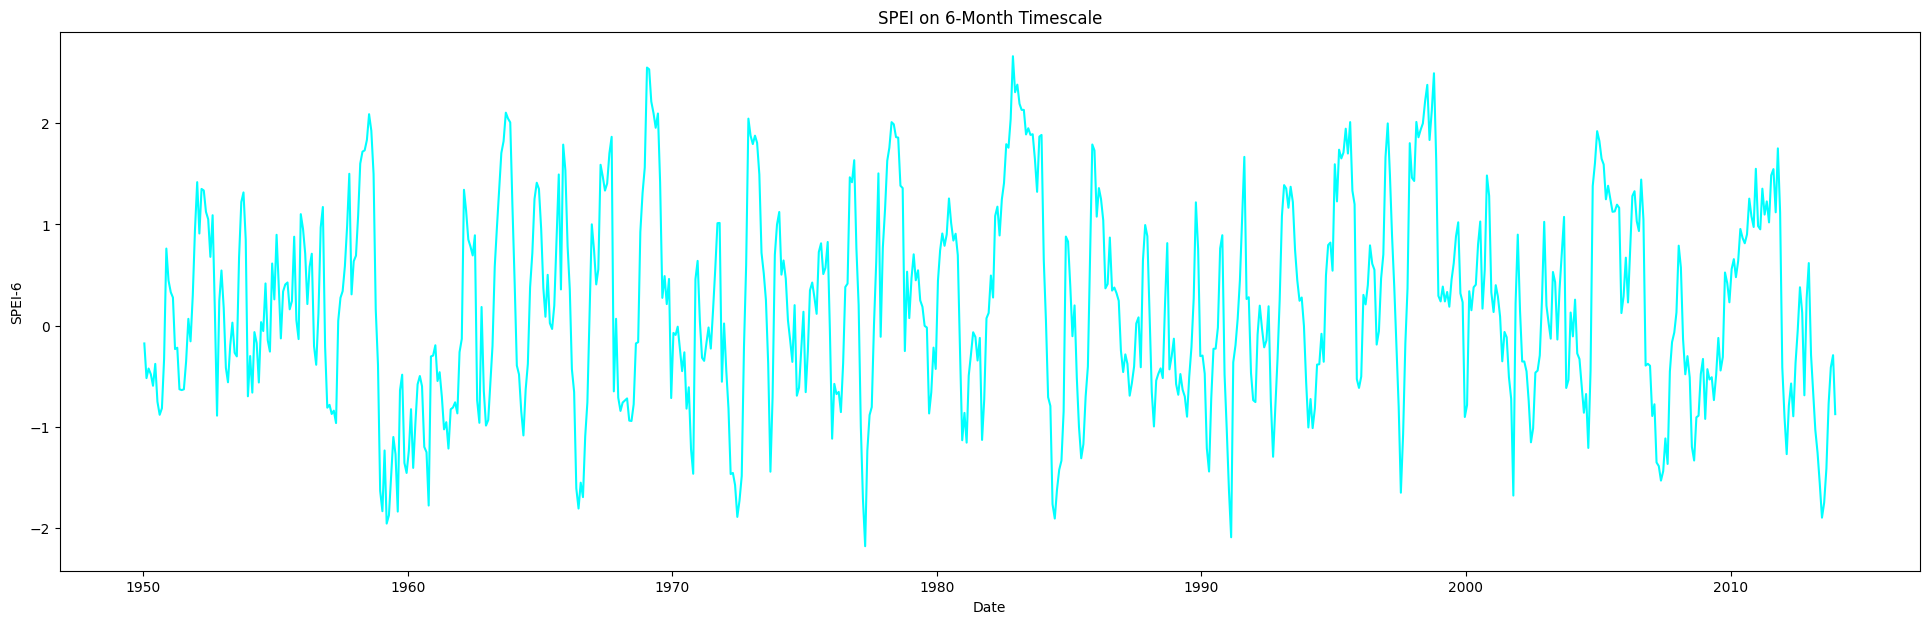

<Figure size 1800x600 with 0 Axes>

In [82]:
spei6_df['time'] = pd.to_datetime(spei6_df['time'], format='%Y-%m-%d')
spei6_df.set_index('time', inplace=True)
graph_spei_data(spei6_df, 6)

In [29]:
# normalize data
scaler = MinMaxScaler(feature_range=(-1, 1))
spei6_df['spei'] = scaler.fit_transform(spei6_df[['spei']])
spei6_df.head(5)

,time,lon,lat,spei
0,1950-01-16,-119.75,36.75,-0.172372
1,1950-02-15,-119.75,36.75,-0.313809
2,1950-03-16,-119.75,36.75,-0.274744
3,1950-04-16,-119.75,36.75,-0.298238
4,1950-05-16,-119.75,36.75,-0.345028


In [30]:
# get data samples
time_steps = 6
X_spei6, y_spei6 = create_samples(spei6_df['spei'].values, time_steps)

# reshape input data (samples, timesteps, features)
X_spei6 = X_spei6.reshape((X_spei6.shape[0], X_spei6.shape[1], 1))
print(X_spei6.shape)
print(y_spei6.shape)

for i in range(len(X_spei6)):
  if (i == 2):
    break
  print(X_spei6[i], y_spei6[i])

(762, 6, 1)
(762,)
[[-0.1723716 ]
 [-0.31380863]
 [-0.27474426]
 [-0.29823832]
 [-0.3450278 ]
 [-0.25576174]] -0.4100309390992742
[[-0.31380863]
 [-0.27474426]
 [-0.29823832]
 [-0.3450278 ]
 [-0.25576174]
 [-0.41003094]] -0.46355073071756764


In [31]:
train_size = int(len(X_spei6) * 0.8)
val_size = int(len(X_spei6) * 0.1)

X_train_spei6, y_train_spei6 = X_spei6[:train_size], y_spei6[:train_size]
X_val_spei6, y_val_spei6 = X_spei6[train_size : train_size + val_size], y_spei6[train_size : train_size + val_size]
X_test_spei6, y_test_spei6 = X_spei6[train_size + val_size :], y_spei6[train_size + val_size :]


print(f"Training splits (80%):  X_train = {X_train_spei6.shape} | y_train = {y_train_spei6.shape}")
print(f"Validation splits (10%):  X_val = {X_val_spei6.shape} | y_val = {y_val_spei6.shape}")
print(f"Test splits (10%):  X_test = {X_test_spei6.shape} | y_test = {y_test_spei6.shape}")

Training splits (80%):  X_train = (609, 6, 1) | y_train = (609,)
Validation splits (10%):  X_val = (76, 6, 1) | y_val = (76,)
Test splits (10%):  X_test = (77, 6, 1) | y_test = (77,)


In [32]:
X_train_spei6[0], y_train_spei6[0]  # example sample

(array([[-0.1723716 ],
        [-0.31380863],
        [-0.27474426],
        [-0.29823832],
        [-0.3450278 ],
        [-0.25576174]]),
 -0.4100309390992742)

In [33]:
y_test_spei6.max(), y_test_spei6.min()

(0.6238424759993554, -0.8834321867100817)

### SPEI-12

In [106]:
# load data
spei12_df = pd.read_csv('/content/SPEI_12_MonthTimescale_1950_2013_Fresno.csv')
spei12_df.head(5)

,time,lon,lat,spei
0,1950-01-16,-119.75,36.75,-0.291648
1,1950-02-15,-119.75,36.75,-0.343679
2,1950-03-16,-119.75,36.75,-0.756500
3,1950-04-16,-119.75,36.75,-0.402883
4,1950-05-16,-119.75,36.75,-0.857081


In [107]:
spei12_df.isnull().sum()

,0
time,0
lon,0
lat,0
spei,0


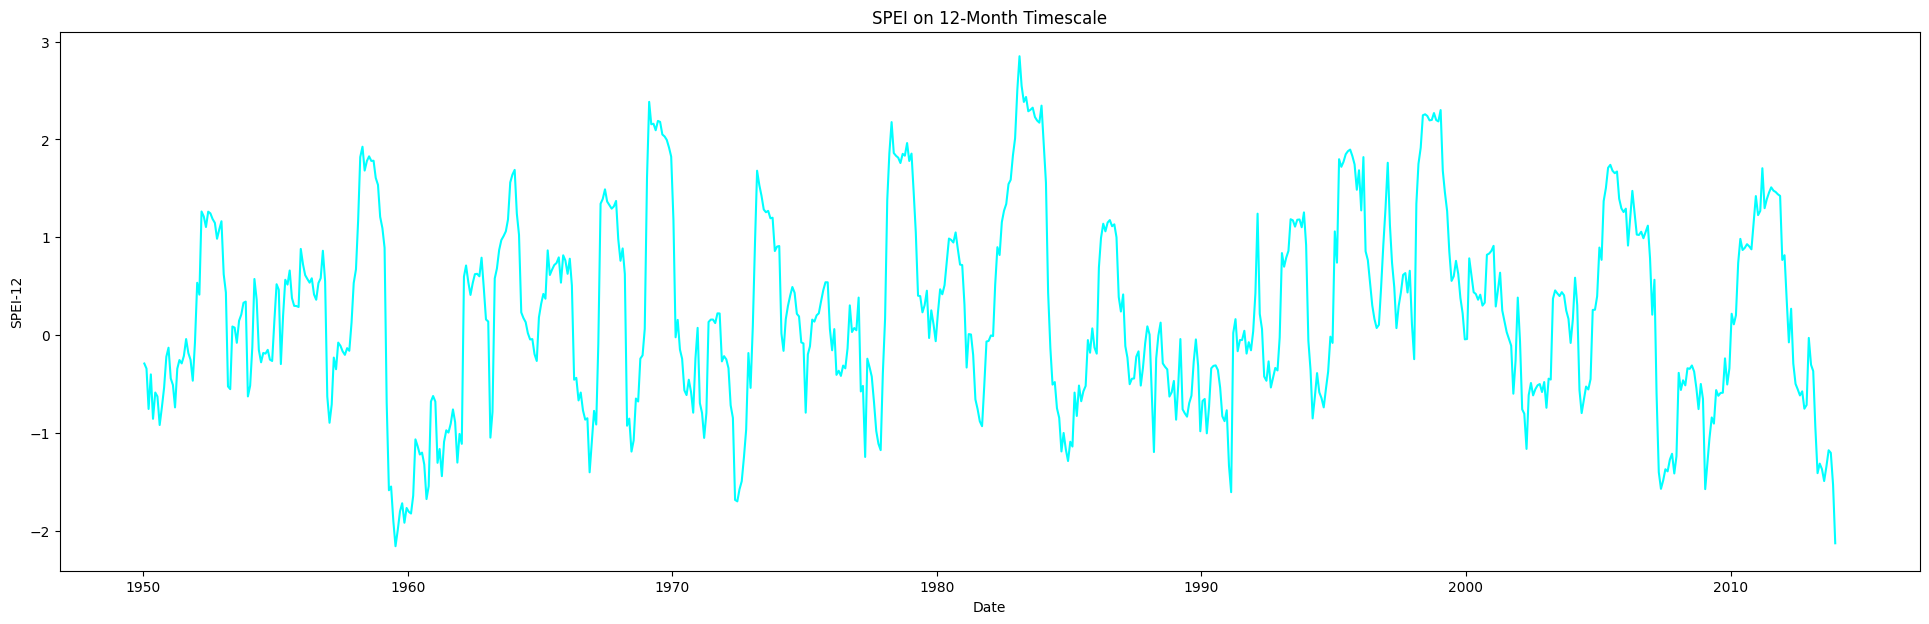

<Figure size 1800x600 with 0 Axes>

In [108]:
spei12_df['time'] = pd.to_datetime(spei12_df['time'], format='%Y-%m-%d')
spei12_df.set_index('time', inplace=True)
graph_spei_data(spei12_df, 12)

In [109]:
# normalize data
scaler = MinMaxScaler(feature_range=(-1, 1))
spei12_df['spei'] = scaler.fit_transform(spei12_df[['spei']])
spei12_df.head(5)

,lon,lat,spei
time,,,
1950-01-16,-119.75,36.75,-0.254282
1950-02-15,-119.75,36.75,-0.275047
1950-03-16,-119.75,36.75,-0.439800
1950-04-16,-119.75,36.75,-0.298675
1950-05-16,-119.75,36.75,-0.479941


In [110]:
# get data samples
time_steps = 6
X_spei12, y_spei12 = create_samples(spei12_df['spei'].values, time_steps)

# reshape input data (samples, timesteps, features)
X_spei12 = X_spei12.reshape((X_spei12.shape[0], X_spei12.shape[1], 1))
print(X_spei12.shape)
print(y_spei12.shape)

for i in range(len(X_spei12)):
  if (i == 2):
    break
  print(X_spei12[i], y_spei12[i])

(762, 6, 1)
(762,)
[[-0.25428211]
 [-0.27504714]
 [-0.43980007]
 [-0.29867463]
 [-0.47994073]
 [-0.37269773]] -0.3888320735117884
[[-0.27504714]
 [-0.43980007]
 [-0.29867463]
 [-0.47994073]
 [-0.37269773]
 [-0.38883207]] -0.5052636813331275


In [111]:
train_size = int(len(X_spei12) * 0.8)
val_size = int(len(X_spei12) * 0.1)

X_train_spei12, y_train_spei12 = X_spei12[:train_size], y_spei12[:train_size]
X_val_spei12, y_val_spei12 = X_spei12[train_size : train_size + val_size], y_spei12[train_size : train_size + val_size]
X_test_spei12, y_test_spei12 = X_spei12[train_size + val_size :], y_spei12[train_size + val_size :]


print(f"Training splits (80%):  X_train = {X_train_spei12.shape} | y_train = {y_train_spei12.shape}")
print(f"Validation splits (10%):  X_val = {X_val_spei12.shape} | y_val = {y_val_spei12.shape}")
print(f"Test splits (10%):  X_test = {X_test_spei12.shape} | y_test = {y_test_spei12.shape}")

Training splits (80%):  X_train = (609, 6, 1) | y_train = (609,)
Validation splits (10%):  X_val = (76, 6, 1) | y_val = (76,)
Test splits (10%):  X_test = (77, 6, 1) | y_test = (77,)


In [112]:
X_train_spei12[0], y_train_spei12[0]  # example sample

(array([[-0.25428211],
        [-0.27504714],
        [-0.43980007],
        [-0.29867463],
        [-0.47994073],
        [-0.37269773]]),
 -0.3888320735117884)

In [113]:
y_test_spei12.max(), y_test_spei12.min()

(0.5428289305961274, -0.9879521433302357)

## LSTM | SPEI-1

### Model Training

In [34]:
keras.utils.set_random_seed(42) # for reproducibility

callback = keras.callbacks.EarlyStopping(monitor='loss', patience=3)


LSTM_model_spei1 = Sequential()
LSTM_model_spei1.add(LSTM(units=64, return_sequences=True, activation='relu', input_shape=(X_train_spei1.shape[1], 1)))
LSTM_model_spei1.add(LSTM(units=64, activation='relu'))
LSTM_model_spei1.add(Dense(1))
LSTM_model_spei1.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

history_spei1 = LSTM_model_spei1.fit(X_train_spei1,
                              y_train_spei1,
                              batch_size=16,
                              validation_data=(X_val_spei1, y_val_spei1),
                              epochs=50,
                              verbose=1, # just determines how much info to display for each epoch
                              shuffle=False)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - loss: 0.1516 - val_loss: 0.1197
Epoch 2/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.1514 - val_loss: 0.1193
Epoch 3/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1511 - val_loss: 0.1189
Epoch 4/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1508 - val_loss: 0.1184
Epoch 5/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1505 - val_loss: 0.1180
Epoch 6/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1503 - val_loss: 0.1177
Epoch 7/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1501 - val_loss: 0.1174
Epoch 8/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1498 - val_loss: 0.1172
Epoch 9/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1496 - val_loss: 0.1171
Epoch 10/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1493 - val_loss: 0.1172
Epoch 11/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1491 - val_loss: 0.1174
Epoch 12/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1

### Evaluation

In [35]:
LSTM_model_spei1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 6, 64)               │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 149,957 (585.77 KB)

 Trainable params: 49,985 (195.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 99,972 (390.52 KB)

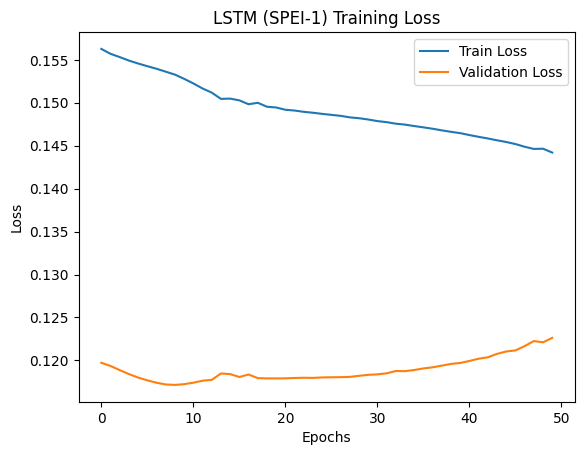

In [36]:
plt.plot(history_spei1.history['loss'], label='Train Loss')
plt.plot(history_spei1.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('LSTM (SPEI-1) Training Loss')
plt.show()

#### Testing

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 168ms/step


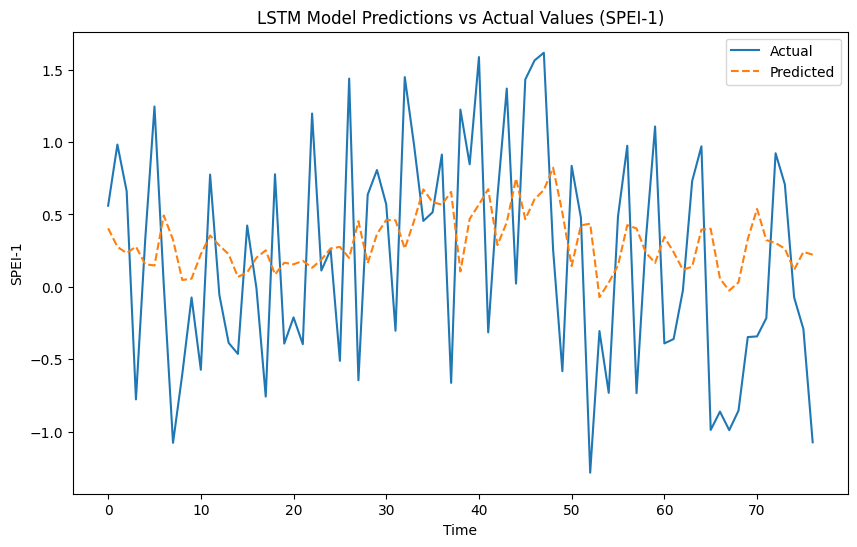

In [37]:
y_pred_spei1 = LSTM_model_spei1.predict(X_test_spei1) # make predictions

# reverse normalized SPEI values back to normal scale
y_pred_original_spei1 = scaler.inverse_transform(y_pred_spei1)
y_test_original_spei1 = scaler.inverse_transform(y_test_spei1.reshape(-1, 1))

# actual vs. predicted
plt.figure(figsize=(10, 6))
plt.plot(y_test_original_spei1, label="Actual")
plt.plot(y_pred_original_spei1, label="Predicted", linestyle="dashed")
plt.xlabel("Time")
plt.ylabel("SPEI-1")
plt.legend()
plt.title("LSTM Model Predictions vs Actual Values (SPEI-1)")
plt.show()

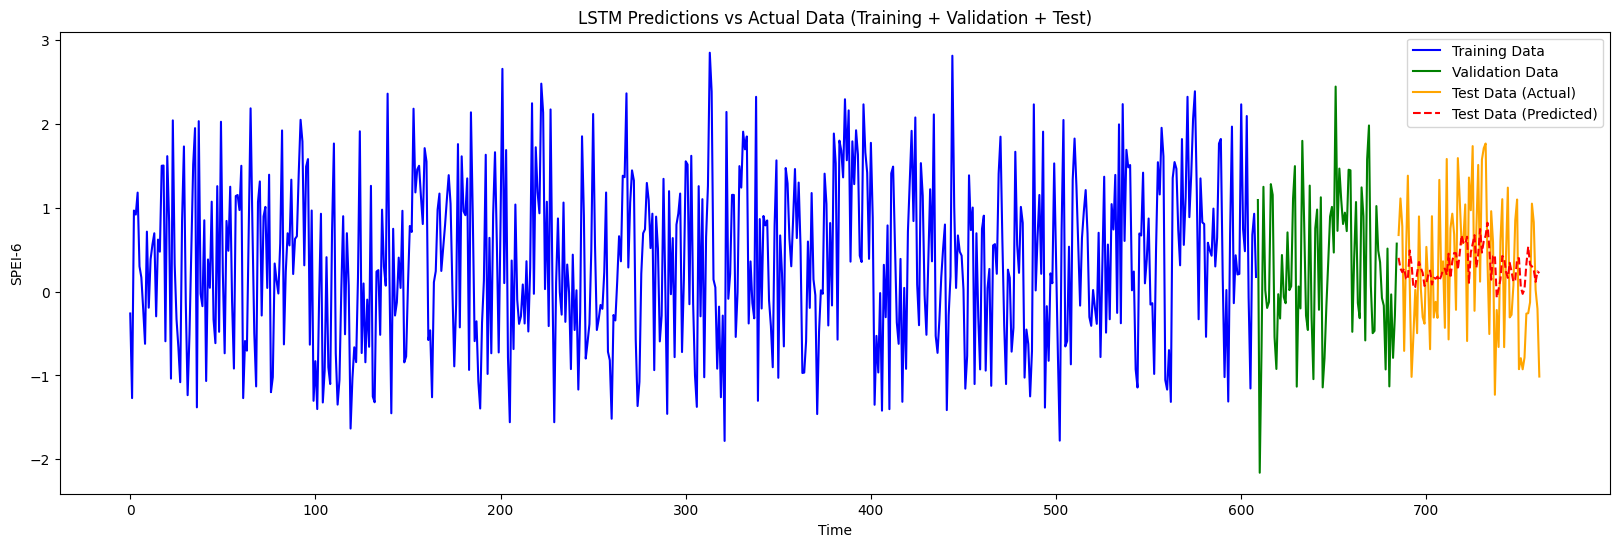

In [105]:
# reverse normalized SPEI values back to normal scale
# concatenate the training, validation, and test data
reversed_train_data_spei1 = scaler.inverse_transform(y_train_spei1.reshape(-1, 1))
reversed_val_data_spei1 = scaler.inverse_transform(y_val_spei1.reshape(-1, 1))
reversed_test_data_spei1 = scaler.inverse_transform(y_test_spei1.reshape(-1, 1))

# Concatenate the actual data (train + validation + test)
actual_data = np.concatenate((reversed_train_data_spei1, reversed_val_data_spei1, reversed_test_data_spei1), axis=0)

# Concatenate the predicted data
# match this array with full data, but set training and validation set with NaN values | this will align the prediction data to only the testing data indices
predicted_data = np.concatenate((np.full_like(reversed_train_data_spei1, np.nan),
                                 np.full_like(reversed_val_data_spei1, np.nan),
                                 y_pred_original_spei1), axis=0)

# plot all data
plt.figure(figsize=(20, 6))

# plot training data
plt.plot(range(len(reversed_train_data_spei1)), reversed_train_data_spei1, label="Training Data", color='blue')

# plot validation data
plt.plot(range(len(reversed_train_data_spei1), len(reversed_train_data_spei1) + len(reversed_val_data_spei1)), reversed_val_data_spei1, label="Validation Data", color='green')

# plot test data (actual)
plt.plot(range(len(reversed_train_data_spei1) + len(reversed_val_data_spei1), len(actual_data)), reversed_test_data_spei1, label="Test Data (Actual)", color='orange')

# plot predicted data (LSTM predictions)
plt.plot(range(len(reversed_train_data_spei1) + len(reversed_val_data_spei1), len(actual_data)), y_pred_original_spei1, label="Test Data (Predicted)", color='red', linestyle='--')


plt.xlabel('Time')
plt.ylabel('SPEI-6')
plt.legend()
plt.title('LSTM Predictions vs Actual Data (Training + Validation + Test)')
plt.show()

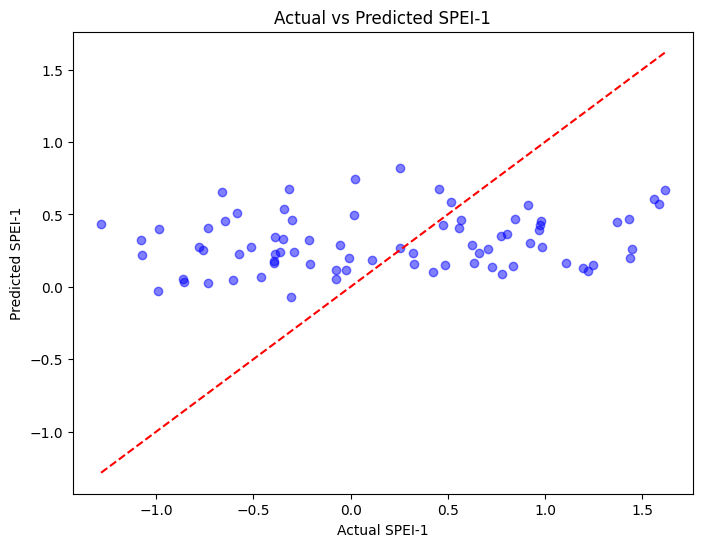

In [39]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test_original_spei1, y_pred_original_spei1, color='blue', alpha=0.5)
plt.plot([min(y_test_original_spei1), max(y_test_original_spei1)], [min(y_test_original_spei1), max(y_test_original_spei1)], color='red', linestyle='--')
plt.xlabel('Actual SPEI-1')
plt.ylabel('Predicted SPEI-1')
plt.title('Actual vs Predicted SPEI-1')
plt.show()

#### Metrics

In [42]:
# mean absolute error (MAE)
mae_spei1 = mean_absolute_error(y_test_original_spei1, y_pred_original_spei1)
print(f"Mean Absolute Error: {mae_spei1}")

Mean Absolute Error: 0.6614703603049928


In [43]:
# mean squared error (MSE)
mse_spei1 = mean_squared_error(y_test_original_spei1, y_pred_original_spei1)
print(f"Mean Squared Error: {mse_spei1}")

Mean Squared Error: 0.5820703286010819


In [44]:
# root mean squared error (RMSE)
rmse_spei1 = np.sqrt(mse_spei1)
print(f"Root Mean Squared Error: {rmse_spei1}")

Root Mean Squared Error: 0.7629353371034021


In [45]:
# R^2
r2_spei1 = r2_score(y_test_original_spei1, y_pred_original_spei1)
print(f"R^2 Score: {r2_spei1}")

R^2 Score: 0.008997025240627288


### Fine-Tuning

#### No Batching

In [ ]:
LSTM_model_v2 = Sequential()
LSTM_model_v2.add(LSTM(units=64, return_sequences=True, activation='relu', input_shape=(X_train.shape[1], 1)))
LSTM_model_v2.add(LSTM(units=64, activation='relu'))
LSTM_model_v2.add(Dense(1))
LSTM_model_v2.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

history_v2 = LSTM_model_v2.fit(X_train,
                         y_train,
                        #  batch_size=16,
                         validation_data=(X_val, y_val),
                         epochs=50,
                         verbose=1, # just determines how much info to display for each epoch
                         shuffle=False)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - loss: 0.1485 - val_loss: 0.1262
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.1356 - val_loss: 0.1098
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.1207 - val_loss: 0.0932
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.1036 - val_loss: 0.0820
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0819 - val_loss: 0.0649
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0589 - val_loss: 0.0736
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0659 - val_loss: 0.0572
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0547 - val_loss: 0.0539
Epoch 9/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0532 - val_loss: 0.0533
Epoch 10/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0528 - val_loss: 0.0517
Epoch 11/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0499 - val_loss: 0.0519
Epoch 12/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0515 - val_l

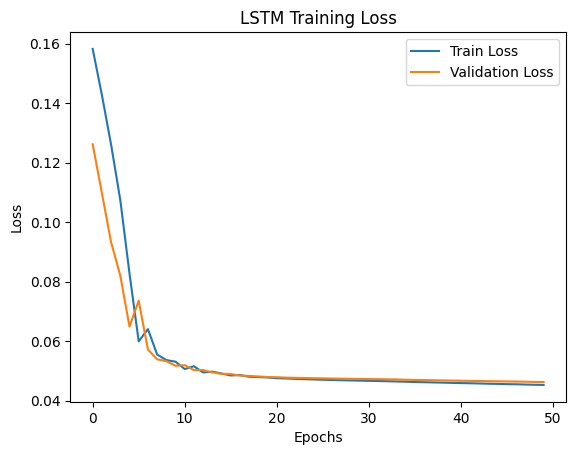

In [ ]:
plt.plot(history_v2.history['loss'], label='Train Loss')
plt.plot(history_v2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('LSTM Training Loss')
plt.show()

#### Dropout Layers

In [ ]:
LSTM_model_v3 = Sequential()
LSTM_model_v3.add(LSTM(units=64, return_sequences=True, activation='relu', input_shape=(X_train.shape[1], 1)))
LSTM_model_v3.add(Dropout(0.2))
LSTM_model_v3.add(LSTM(units=64, activation='relu'))
LSTM_model_v3.add(Dropout(0.2))
LSTM_model_v3.add(Dense(1))
LSTM_model_v3.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

history_v3 = LSTM_model_v3.fit(X_train,
                               y_train,
                               #  batch_size=16,
                               validation_data=(X_val, y_val),
                               epochs=50,
                               verbose=1, # just determines how much info to display for each epoch
                               shuffle=False)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.1504 - val_loss: 0.1268
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1365 - val_loss: 0.1087
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1196 - val_loss: 0.0905
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1000 - val_loss: 0.0764
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0832 - val_loss: 0.0650
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0727 - val_loss: 0.0583
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0637 - val_loss: 0.0581
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0641 - val_loss: 0.0573
Epoch 9/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0631 - val_loss: 0.0575
Epoch 10/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0637 - val_loss: 0.0615
Epoch 11/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0631 - val_loss: 0.0569
Epoch 12/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0

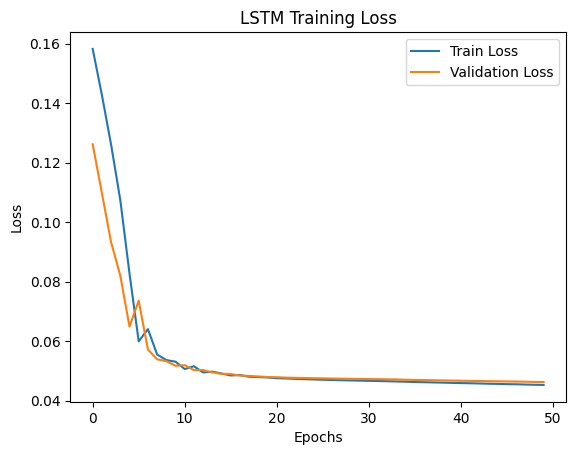

In [ ]:
plt.plot(history_v2.history['loss'], label='Train Loss')
plt.plot(history_v2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('LSTM Training Loss')
plt.show()

## LSTM | SPEI-6

### Model Training

In [21]:
keras.utils.set_random_seed(42) # for reproducibility

callback = keras.callbacks.EarlyStopping(monitor='loss', patience=3)


LSTM_model_spei6 = Sequential()
LSTM_model_spei6.add(LSTM(units=64, return_sequences=True, activation='relu', input_shape=(X_train_spei6.shape[1], 1)))
LSTM_model_spei6.add(LSTM(units=64, activation='relu'))
LSTM_model_spei6.add(Dense(1))
LSTM_model_spei6.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

history_spei6 = LSTM_model_spei6.fit(X_train_spei6,
                              y_train_spei6,
                              batch_size=16,
                              validation_data=(X_val_spei6, y_val_spei6),
                              epochs=50,
                              verbose=1, # just determines how much info to display for each epoch
                              shuffle=False)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.1464 - val_loss: 0.1167
Epoch 2/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1224 - val_loss: 0.0894
Epoch 3/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0915 - val_loss: 0.0722
Epoch 4/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0776 - val_loss: 0.0641
Epoch 5/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0714 - val_loss: 0.0555
Epoch 6/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0529 - val_loss: 0.0594
Epoch 7/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0606 - val_loss: 0.0540
Epoch 8/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0527 - val_loss: 0.0545
Epoch 9/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0545 - val_loss: 0.0520
Epoch 10/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0505 - val_loss: 0.0517
Epoch 11/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0506 - val_loss: 0.0507
Epoch 12/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0

### Evaluation

In [22]:
LSTM_model_spei6.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 6, 64)               │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 149,957 (585.77 KB)

 Trainable params: 49,985 (195.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 99,972 (390.52 KB)

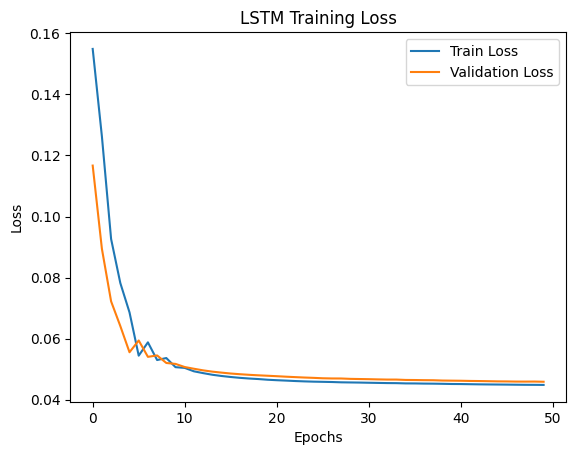

In [23]:
plt.plot(history_spei6.history['loss'], label='Train Loss')
plt.plot(history_spei6.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('LSTM Training Loss')
plt.show()

#### Testing

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 167ms/step


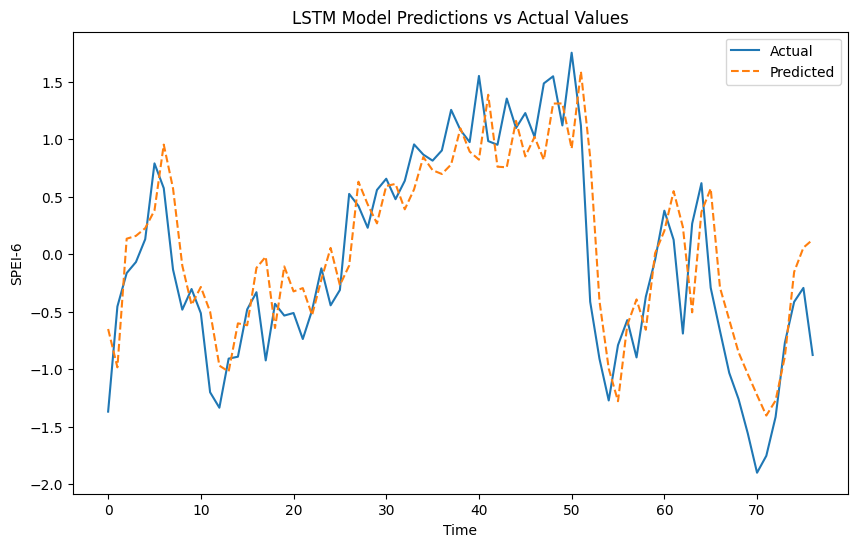

In [24]:
y_pred_spei6 = LSTM_model_spei6.predict(X_test_spei6) # make predictions

# reverse normalized SPEI values back to normal scale
y_pred_original_spei6 = scaler.inverse_transform(y_pred_spei6)
y_test_original_spei6 = scaler.inverse_transform(y_test_spei6.reshape(-1, 1))

# actual vs. predicted
plt.figure(figsize=(10, 6))
plt.plot(y_test_original_spei6, label="Actual")
plt.plot(y_pred_original_spei6, label="Predicted", linestyle="dashed")
plt.xlabel("Time")
plt.ylabel("SPEI-6")
plt.legend()
plt.title("LSTM Model Predictions vs Actual Values")
plt.show()

In [118]:
# reverse normalized SPEI values back to normal scale
# concatenate the training, validation, and test data
train_data1 = scaler.inverse_transform(y_train_spei6.reshape(-1, 1))
val_data1 = scaler.inverse_transform(y_val_spei6.reshape(-1, 1))
test_data1 = scaler.inverse_transform(y_test_spei6.reshape(-1, 1))

# Concatenate the actual data (train + validation + test)
actual_data = np.concatenate((train_data1, val_data1, test_data1), axis=0)

# Concatenate the predicted data
# match this array with full data, but set training and validation set with NaN values | this will align the prediction data to only the testing data indices
predicted_data = np.concatenate((np.full_like(train_data1, np.nan),
                                 np.full_like(val_data1, np.nan),
                                 y_pred_original_spei6), axis=0)

# plot all data
plt.figure(figsize=(20, 6))

# plot training data
plt.plot(range(len(train_data1)), train_data1, label="Training Data", color='blue')

# plot validation data
plt.plot(range(len(train_data1), len(train_data1) + len(val_data1)), val_data1, label="Validation Data", color='green')

# plot test data (actual)
plt.plot(range(len(train_data1) + len(val_data1), len(actual_data)), test_data1, label="Test Data (Actual)", color='orange')

# plot predicted data (LSTM predictions)
plt.plot(range(len(train_data1) + len(val_data1), len(actual_data)), y_pred_original_spei6, label="Test Data (Predicted)", color='red', linestyle='--')


plt.xlabel('Time')
plt.ylabel('SPEI-6')
plt.legend()
plt.title('LSTM Predictions vs Actual Data (Training + Validation + Test)')
plt.show()

NameError: name 'y_pred_original_spei6' is not defined

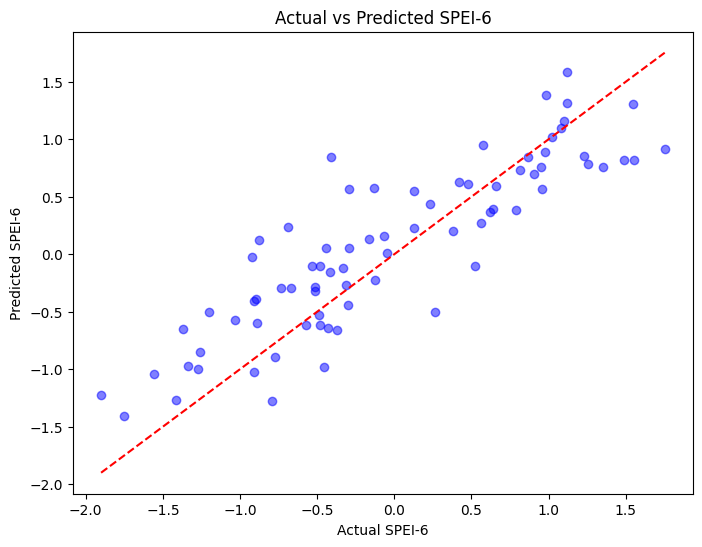

In [26]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test_original_spei6, y_pred_original_spei6, color='blue', alpha=0.5)
plt.plot([min(y_test_original_spei6), max(y_test_original_spei6)], [min(y_test_original_spei6), max(y_test_original_spei6)], color='red', linestyle='--')
plt.xlabel('Actual SPEI-6')
plt.ylabel('Predicted SPEI-6')
plt.title('Actual vs Predicted SPEI-6')
plt.show()

#### Metrics

In [27]:
# mean absolute error (MAE)
mae = mean_absolute_error(y_test_original_spei6, y_pred_original_spei6)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 0.3646360388686361


In [28]:
# mean squared error (MSE)
mse = mean_squared_error(y_test_original_spei6, y_pred_original_spei6)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.20276759978672718


In [29]:
# root mean squared error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 0.45029723493124757


In [30]:
# R^2
r2 = r2_score(y_test_original_spei6, y_pred_original_spei6)
print(f"R^2 Score: {r2}")

R^2 Score: 0.7470627063394547


#### Forecasting

In [31]:
# get the last sequence from the dataset to start forecasting
future_input = X_test_spei6[-1]  # last known data
future_predictions = []

num_forecast = 20  # forecast next 20 months

for _ in range(num_forecast):
    # Reshape input to fit model
    future_input = future_input.reshape(1, time_steps, 1)

    # Predict the next month
    next_pred = LSTM_model_spei6.predict(future_input)

    # Store prediction
    future_predictions.append(next_pred[0, 0])

    # Update future_input (slide the window forward)
    future_input = np.append(future_input[0, 1:], next_pred, axis=0)

# Convert predictions back to original scale
future_predictions_original = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


In [32]:
# Convert 'time' column to datetime if not already
spei6_df['time'] = pd.to_datetime(spei6_df['time'])

# Get test set time index
test_dates = spei6_df['time'].iloc[-len(y_test_original):]

# Generate future dates
last_date = test_dates.iloc[-1]  # Last known date
future_dates = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=num_forecast, freq='M')


<ipython-input-32-bc581f904932>:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=num_forecast, freq='M')


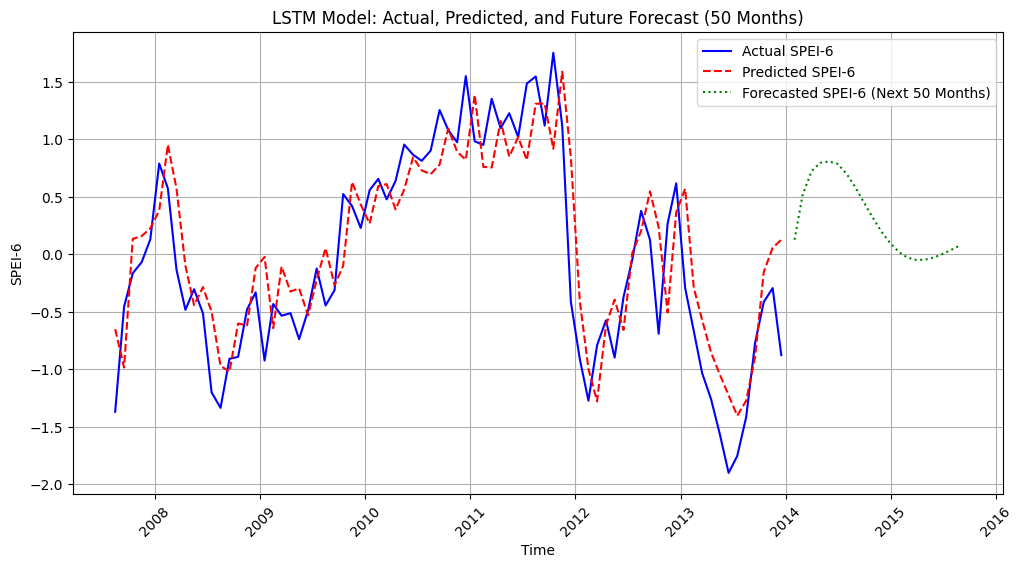

In [33]:
plt.figure(figsize=(12,6))

# Plot actual test values
plt.plot(test_dates, y_test_original, label="Actual SPEI-6", color="blue")

# Plot predicted test values
plt.plot(test_dates, y_pred_original, label="Predicted SPEI-6", color="red", linestyle="dashed")

# Plot future forecasted values
plt.plot(future_dates, future_predictions_original, label="Forecasted SPEI-6 (Next 50 Months)", color="green", linestyle="dotted")

plt.xlabel("Time")
plt.ylabel("SPEI-6")
plt.title("LSTM Model: Actual, Predicted, and Future Forecast (50 Months)")
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()


### Fine-Tuning

#### No Batching

In [34]:
LSTM_model_v2 = Sequential()
LSTM_model_v2.add(LSTM(units=64, return_sequences=True, activation='relu', input_shape=(X_train.shape[1], 1)))
LSTM_model_v2.add(LSTM(units=64, activation='relu'))
LSTM_model_v2.add(Dense(1))
LSTM_model_v2.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

history_v2 = LSTM_model_v2.fit(X_train,
                         y_train,
                        #  batch_size=16,
                         validation_data=(X_val, y_val),
                         epochs=50,
                         verbose=1, # just determines how much info to display for each epoch
                         shuffle=False)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - loss: 0.1485 - val_loss: 0.1262
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.1356 - val_loss: 0.1098
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.1207 - val_loss: 0.0932
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.1036 - val_loss: 0.0820
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0819 - val_loss: 0.0649
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0589 - val_loss: 0.0736
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0659 - val_loss: 0.0572
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0547 - val_loss: 0.0539
Epoch 9/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0532 - val_loss: 0.0533
Epoch 10/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0528 - val_loss: 0.0517
Epoch 11/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0499 - val_loss: 0.0519
Epoch 12/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0515 - val_l

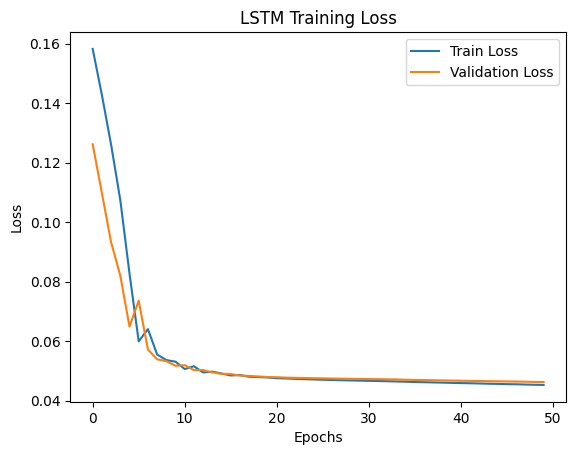

In [35]:
plt.plot(history_v2.history['loss'], label='Train Loss')
plt.plot(history_v2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('LSTM Training Loss')
plt.show()

#### Dropout Layers

In [36]:
LSTM_model_v3 = Sequential()
LSTM_model_v3.add(LSTM(units=64, return_sequences=True, activation='relu', input_shape=(X_train.shape[1], 1)))
LSTM_model_v3.add(Dropout(0.2))
LSTM_model_v3.add(LSTM(units=64, activation='relu'))
LSTM_model_v3.add(Dropout(0.2))
LSTM_model_v3.add(Dense(1))
LSTM_model_v3.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

history_v3 = LSTM_model_v3.fit(X_train,
                               y_train,
                               #  batch_size=16,
                               validation_data=(X_val, y_val),
                               epochs=50,
                               verbose=1, # just determines how much info to display for each epoch
                               shuffle=False)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.1504 - val_loss: 0.1268
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1365 - val_loss: 0.1087
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1196 - val_loss: 0.0905
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1000 - val_loss: 0.0764
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0832 - val_loss: 0.0650
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0727 - val_loss: 0.0583
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0637 - val_loss: 0.0581
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0641 - val_loss: 0.0573
Epoch 9/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0631 - val_loss: 0.0575
Epoch 10/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0637 - val_loss: 0.0615
Epoch 11/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0631 - val_loss: 0.0569
Epoch 12/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0

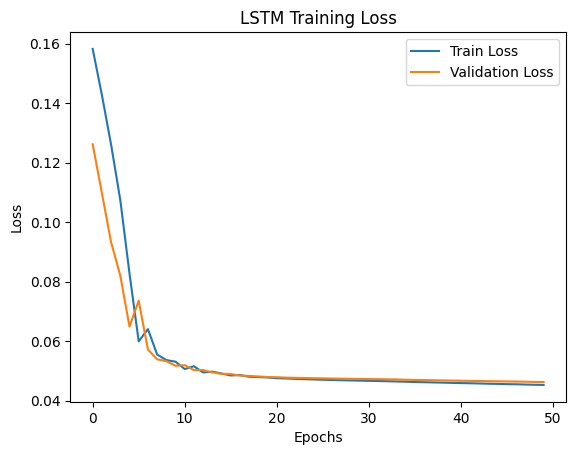

In [37]:
plt.plot(history_v2.history['loss'], label='Train Loss')
plt.plot(history_v2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('LSTM Training Loss')
plt.show()

## LSTM | SPEI-12

### Model Training

In [114]:
keras.utils.set_random_seed(42) # for reproducibility

callback = keras.callbacks.EarlyStopping(monitor='loss', patience=3)


LSTM_model_spei12 = Sequential()
LSTM_model_spei12.add(LSTM(units=64, return_sequences=True, activation='relu', input_shape=(X_train_spei12.shape[1], 1)))
LSTM_model_spei12.add(LSTM(units=64, activation='relu'))
LSTM_model_spei12.add(Dense(1))
LSTM_model_spei12.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

history_spei12 = LSTM_model_spei12.fit(X_train_spei12,
                                      y_train_spei12,
                                      batch_size=16,
                                      validation_data=(X_val_spei12, y_val_spei12),
                                      epochs=50,
                                      verbose=1, # just determines how much info to display for each epoch
                                      shuffle=False)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.1281 - val_loss: 0.0786
Epoch 2/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0865 - val_loss: 0.0530
Epoch 3/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0598 - val_loss: 0.0427
Epoch 4/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0501 - val_loss: 0.0371
Epoch 5/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0431 - val_loss: 0.0416
Epoch 6/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0455 - val_loss: 0.0331
Epoch 7/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0367 - val_loss: 0.0251
Epoch 8/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0272 - val_loss: 0.0238
Epoch 9/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0272 - val_loss: 0.0215
Epoch 10/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0260 - val_loss: 0.0275
Epoch 11/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0267 - val_loss: 0.0276
Epoch 12/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0274 - val_l

### Evaluation

In [115]:
LSTM_model_spei12.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 6, 64)               │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 149,957 (585.77 KB)

 Trainable params: 49,985 (195.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 99,972 (390.52 KB)

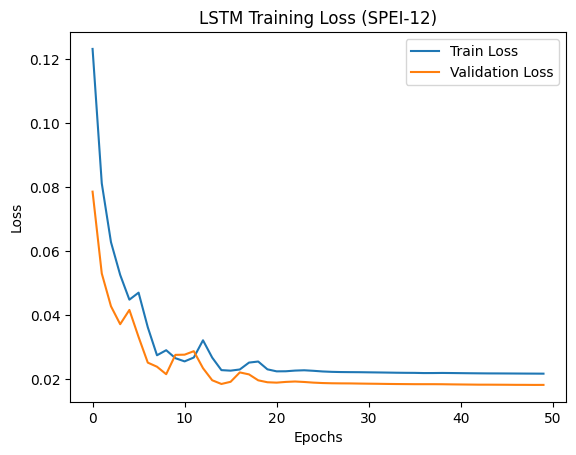

In [116]:
plt.plot(history_spei12.history['loss'], label='Train Loss')
plt.plot(history_spei12.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('LSTM Training Loss (SPEI-12)')
plt.show()

#### Testing

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 161ms/step


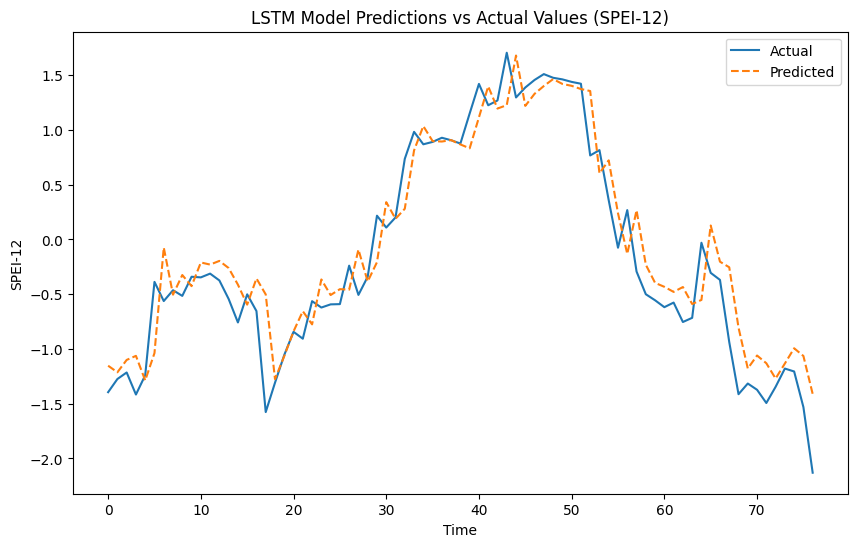

In [117]:
y_pred_spei12 = LSTM_model_spei12.predict(X_test_spei12) # make predictions

# reverse normalized SPEI values back to normal scale
y_pred_original_spei12 = scaler.inverse_transform(y_pred_spei12)
y_test_original_spei12 = scaler.inverse_transform(y_test_spei12.reshape(-1, 1))

# actual vs. predicted
plt.figure(figsize=(10, 6))
plt.plot(y_test_original_spei12, label="Actual")
plt.plot(y_pred_original_spei12, label="Predicted", linestyle="dashed")
plt.xlabel("Time")
plt.ylabel("SPEI-12")
plt.legend()
plt.title("LSTM Model Predictions vs Actual Values (SPEI-12)")
plt.show()

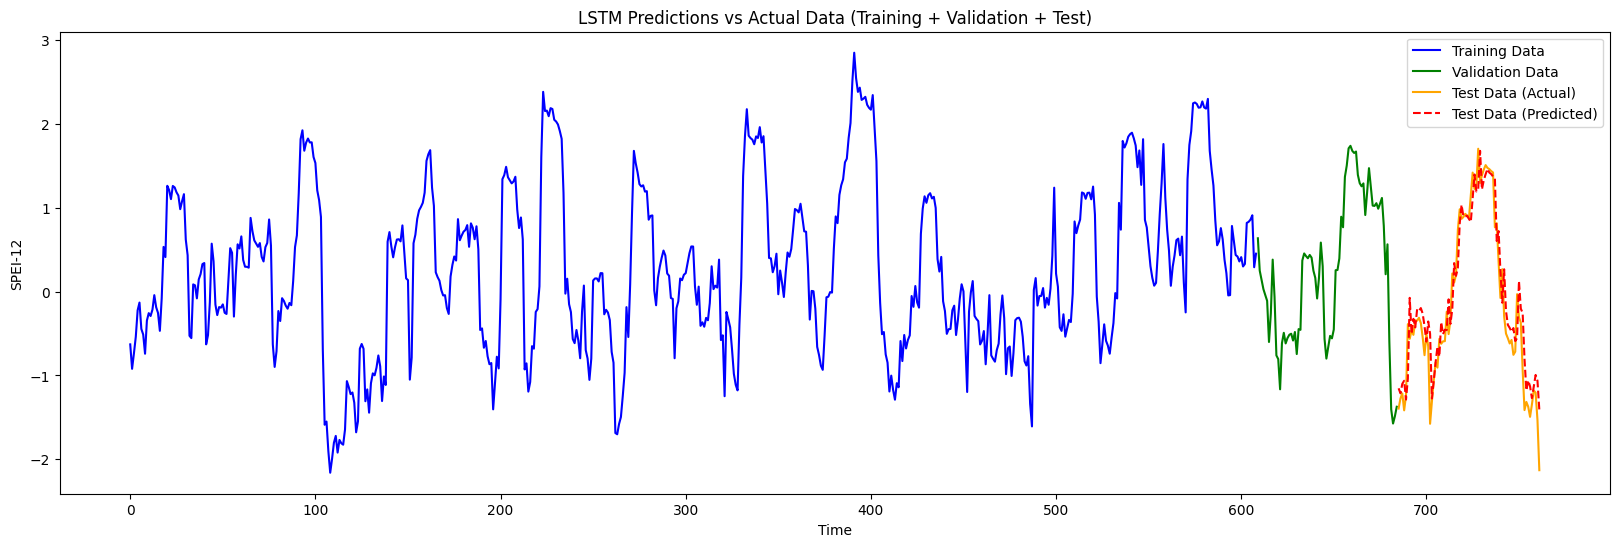

In [119]:
# reverse normalized SPEI values back to normal scale
# concatenate the training, validation, and test data
normal_train_data_spei12 = scaler.inverse_transform(y_train_spei12.reshape(-1, 1))
normal_val_data_spei12 = scaler.inverse_transform(y_val_spei12.reshape(-1, 1))
normal_test_data_spei12 = scaler.inverse_transform(y_test_spei12.reshape(-1, 1))

# Concatenate the actual data (train + validation + test)
actual_data_spei12 = np.concatenate((normal_train_data_spei12, normal_val_data_spei12, normal_test_data_spei12), axis=0)

# Concatenate the predicted data
# match this array with full data, but set training and validation set with NaN values | this will align the prediction data to only the testing data indices
predicted_data_spei12 = np.concatenate((np.full_like(normal_train_data_spei12, np.nan),
                                 np.full_like(normal_val_data_spei12, np.nan),
                                 y_pred_original_spei12), axis=0)

# plot all data
plt.figure(figsize=(20, 6))

# plot training data
plt.plot(range(len(normal_train_data_spei12)), normal_train_data_spei12, label="Training Data", color='blue')

# plot validation data
plt.plot(range(len(normal_train_data_spei12), len(normal_train_data_spei12) + len(normal_val_data_spei12)), normal_val_data_spei12, label="Validation Data", color='green')

# plot test data (actual)
plt.plot(range(len(normal_train_data_spei12) + len(normal_val_data_spei12), len(actual_data)), normal_test_data_spei12, label="Test Data (Actual)", color='orange')

# plot predicted data (LSTM predictions)
plt.plot(range(len(normal_train_data_spei12) + len(normal_val_data_spei12), len(actual_data)), y_pred_original_spei12, label="Test Data (Predicted)", color='red', linestyle='--')


plt.xlabel('Time')
plt.ylabel('SPEI-12')
plt.legend()
plt.title('LSTM Predictions vs Actual Data (Training + Validation + Test)')
plt.show()

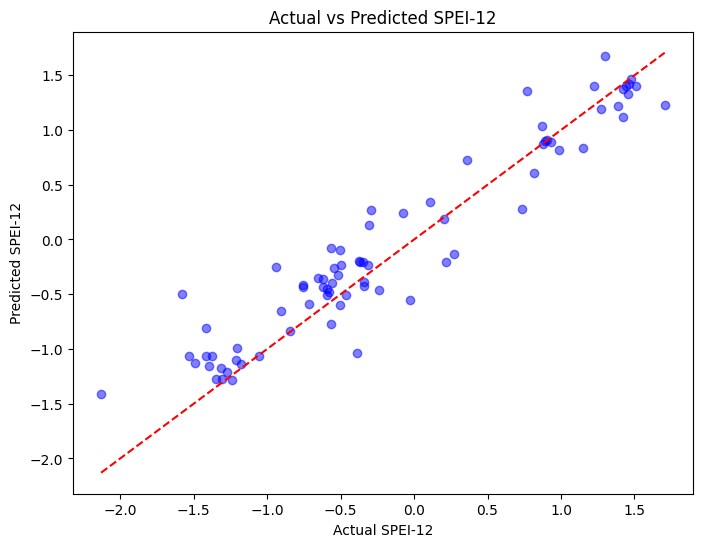

In [120]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test_original_spei12, y_pred_original_spei12, color='blue', alpha=0.5)
plt.plot([min(y_test_original_spei12), max(y_test_original_spei12)], [min(y_test_original_spei12), max(y_test_original_spei12)], color='red', linestyle='--')
plt.xlabel('Actual SPEI-12')
plt.ylabel('Predicted SPEI-12')
plt.title('Actual vs Predicted SPEI-12')
plt.show()

#### Metrics

In [121]:
# mean absolute error (MAE)
mae_spei12 = mean_absolute_error(y_test_original_spei12, y_pred_original_spei12)
print(f"Mean Absolute Error: {mae_spei12}")

Mean Absolute Error: 0.24105272799614816


In [122]:
# mean squared error (MSE)
mse_spei12 = mean_squared_error(y_test_original_spei12, y_pred_original_spei12)
print(f"Mean Squared Error: {mse_spei12}")

Mean Squared Error: 0.10033336910443741


In [123]:
# root mean squared error (RMSE)
rmse_spei12 = np.sqrt(mse_spei12)
print(f"Root Mean Squared Error: {rmse_spei12}")

Root Mean Squared Error: 0.3167544302838358


In [124]:
# R^2
r2_spei12 = r2_score(y_test_original_spei12, y_pred_original_spei12)
print(f"R^2 Score: {r2_spei12}")

R^2 Score: 0.8953437457159582


In [ ]:
# get the last sequence from the dataset to start forecasting
future_input = X_test[-1]  # last known data
future_predictions = []

num_forecast = 20  # forecast next 20 months

for _ in range(num_forecast):
    # Reshape input to fit model
    future_input = future_input.reshape(1, time_steps, 1)

    # Predict the next month
    next_pred = LSTM_model.predict(future_input)

    # Store prediction
    future_predictions.append(next_pred[0, 0])

    # Update future_input (slide the window forward)
    future_input = np.append(future_input[0, 1:], next_pred, axis=0)

# Convert predictions back to original scale
future_predictions_original = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


In [ ]:
# Convert 'time' column to datetime if not already
spei6_df['time'] = pd.to_datetime(spei6_df['time'])

# Get test set time index
test_dates = spei6_df['time'].iloc[-len(y_test_original):]

# Generate future dates
last_date = test_dates.iloc[-1]  # Last known date
future_dates = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=num_forecast, freq='M')


<ipython-input-32-bc581f904932>:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=num_forecast, freq='M')


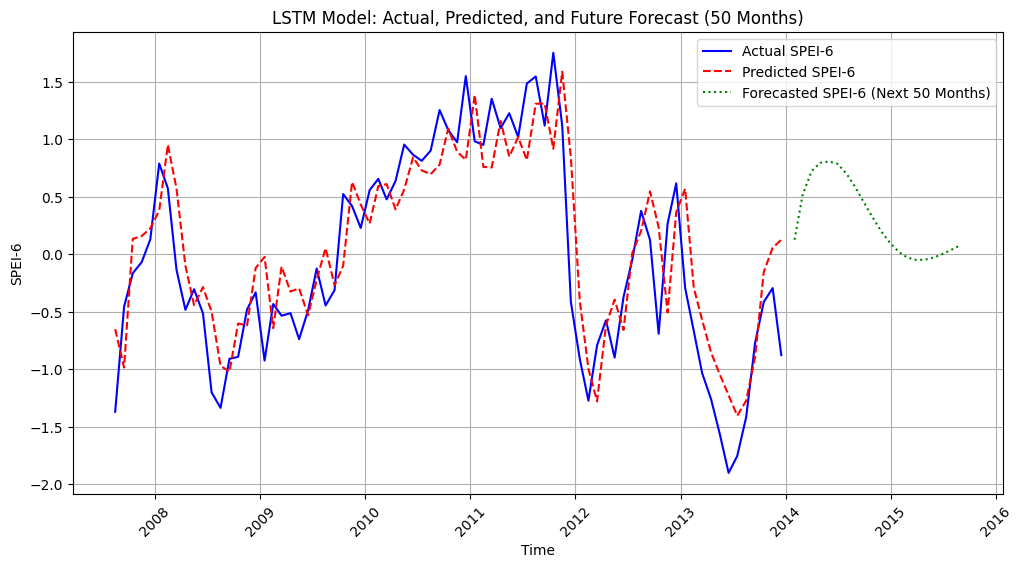

In [ ]:
plt.figure(figsize=(12,6))

# Plot actual test values
plt.plot(test_dates, y_test_original, label="Actual SPEI-6", color="blue")

# Plot predicted test values
plt.plot(test_dates, y_pred_original, label="Predicted SPEI-6", color="red", linestyle="dashed")

# Plot future forecasted values
plt.plot(future_dates, future_predictions_original, label="Forecasted SPEI-6 (Next 50 Months)", color="green", linestyle="dotted")

plt.xlabel("Time")
plt.ylabel("SPEI-6")
plt.title("LSTM Model: Actual, Predicted, and Future Forecast (50 Months)")
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()


### Fine-Tuning

#### No Batching

In [ ]:
LSTM_model_v2 = Sequential()
LSTM_model_v2.add(LSTM(units=64, return_sequences=True, activation='relu', input_shape=(X_train.shape[1], 1)))
LSTM_model_v2.add(LSTM(units=64, activation='relu'))
LSTM_model_v2.add(Dense(1))
LSTM_model_v2.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

history_v2 = LSTM_model_v2.fit(X_train,
                         y_train,
                        #  batch_size=16,
                         validation_data=(X_val, y_val),
                         epochs=50,
                         verbose=1, # just determines how much info to display for each epoch
                         shuffle=False)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - loss: 0.1485 - val_loss: 0.1262
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.1356 - val_loss: 0.1098
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.1207 - val_loss: 0.0932
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.1036 - val_loss: 0.0820
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0819 - val_loss: 0.0649
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0589 - val_loss: 0.0736
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0659 - val_loss: 0.0572
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0547 - val_loss: 0.0539
Epoch 9/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0532 - val_loss: 0.0533
Epoch 10/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0528 - val_loss: 0.0517
Epoch 11/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0499 - val_loss: 0.0519
Epoch 12/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0515 - val_l

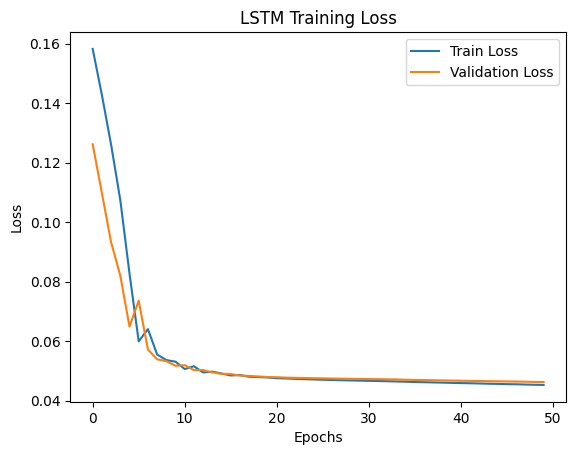

In [ ]:
plt.plot(history_v2.history['loss'], label='Train Loss')
plt.plot(history_v2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('LSTM Training Loss')
plt.show()

#### Dropout Layers

In [ ]:
LSTM_model_v3 = Sequential()
LSTM_model_v3.add(LSTM(units=64, return_sequences=True, activation='relu', input_shape=(X_train.shape[1], 1)))
LSTM_model_v3.add(Dropout(0.2))
LSTM_model_v3.add(LSTM(units=64, activation='relu'))
LSTM_model_v3.add(Dropout(0.2))
LSTM_model_v3.add(Dense(1))
LSTM_model_v3.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

history_v3 = LSTM_model_v3.fit(X_train,
                               y_train,
                               #  batch_size=16,
                               validation_data=(X_val, y_val),
                               epochs=50,
                               verbose=1, # just determines how much info to display for each epoch
                               shuffle=False)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.1504 - val_loss: 0.1268
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1365 - val_loss: 0.1087
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1196 - val_loss: 0.0905
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1000 - val_loss: 0.0764
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0832 - val_loss: 0.0650
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0727 - val_loss: 0.0583
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0637 - val_loss: 0.0581
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0641 - val_loss: 0.0573
Epoch 9/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0631 - val_loss: 0.0575
Epoch 10/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0637 - val_loss: 0.0615
Epoch 11/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0631 - val_loss: 0.0569
Epoch 12/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0

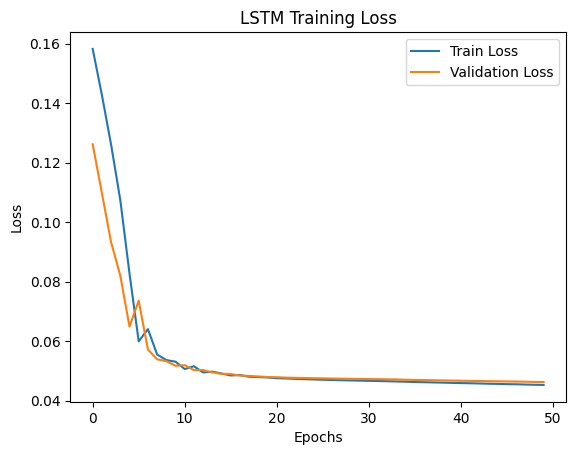

In [ ]:
plt.plot(history_v2.history['loss'], label='Train Loss')
plt.plot(history_v2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('LSTM Training Loss')
plt.show()